<a href="https://colab.research.google.com/github/laisOmena/Machine-Learning/blob/master/Introdu%C3%A7%C3%A3o_a_Machine_Learning_e_Classifica%C3%A7%C3%A3o_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
data = pd.read_csv(uri)
data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [0]:
swap = {
    0 : 1,
    1 : 0
}
data["finished"] = data.unfinished.map(swap)

In [0]:
data.head()

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [0]:
data.tail()

,unfinished,expected_hours,price,finished
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


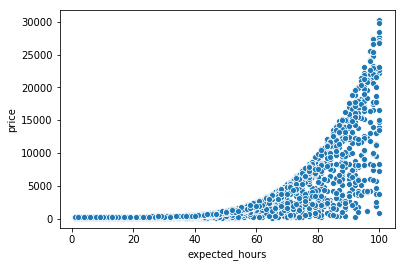

In [0]:
import seaborn as sns

sns.scatterplot(x = "expected_hours", y = "price", data = data)

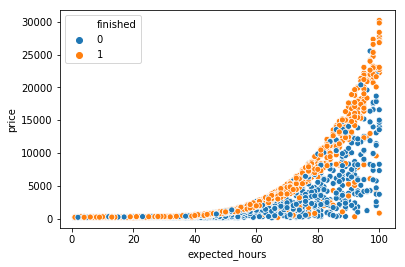

In [0]:
sns.scatterplot(x = "expected_hours", y = "price", data = data, hue = "finished")

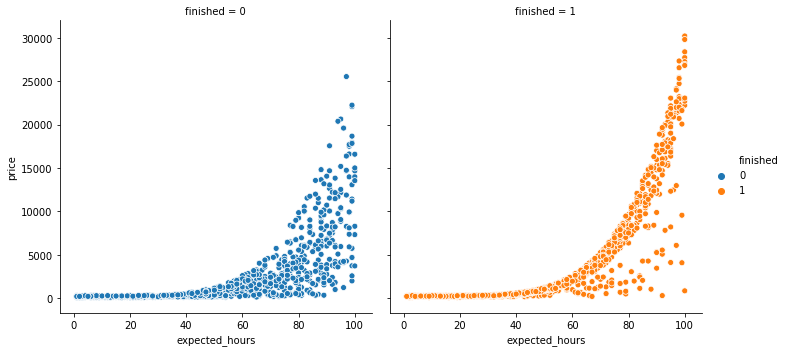

In [0]:
sns.relplot(x = "expected_hours", y = "price", data = data, col = "finished", hue = "finished")

In [0]:
x = data[["expected_hours", "price"]]

y = data["finished"]

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)


train_x, test_x,train_y, test_y = train_test_split(x, y, stratify = y, test_size = 0.25)
print("treinamento com %d elementos e testaremos com %d elementos" %(len(train_x), len(test_x)))

model = LinearSVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

hit_ratio = accuracy_score(test_y, predictions) * 100
print("A acurácia foi %.2f%%" % hit_ratio)

treinamento com 1617 elementos e testaremos com 540 elementos
A acurácia foi 64.44%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


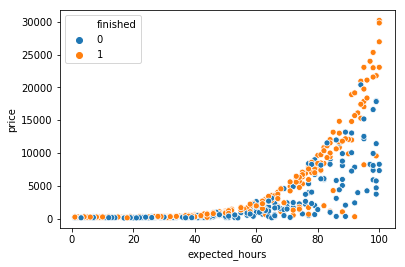

In [0]:
sns.scatterplot(x = "expected_hours", y = "price", data = test_x, hue = test_y)

In [0]:
x_min = test_x.expected_hours.min()
x_max = test_x.expected_hours.max()
y_min = test_x.price.min()
y_max = test_x.price.max()
print(x_min, x_max, y_min, y_max)

1 100 100 30223


In [0]:
import numpy as np

In [0]:
pixels = 100
x_axis = np.arange(x_min, x_max, (x_max - x_min) / pixels)
y_axis = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [0]:
xx, yy = np.meshgrid(x_axis, y_axis)
points = np.c_[xx.ravel(), yy.ravel()]
points

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [0]:
model.predict(points)


array([0, 0, 0, ..., 1, 1, 1])

In [0]:
z = model.predict(points)
z = z.reshape(xx.shape)
z

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

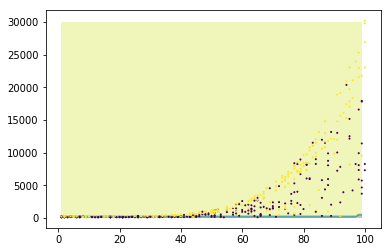

In [0]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, z, alpha= 0.3)
plt.scatter(test_x.expected_hours, test_x.price, c=test_y, s=1)
#decision boundary

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)


raw_train_x, raw_test_x,train_y, test_y = train_test_split(x, y, stratify = y, test_size = 0.25)
print("treinamento com %d elementos e testaremos com %d elementos" %(len(train_x), len(test_x)))

scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

model = SVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

hit_ratio = accuracy_score(test_y, predictions) * 100
print("A acurácia foi %.2f%%" % hit_ratio)

treinamento com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


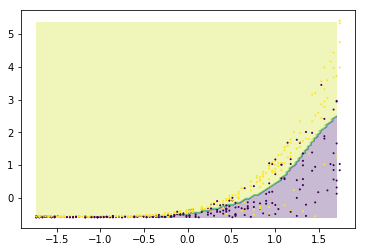

In [0]:
data_x = test_x[:,0]
data_y = test_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
x_axis = np.arange(x_min, x_max, (x_max - x_min) / pixels)
y_axis = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(x_axis, y_axis)
points = np.c_[xx.ravel(), yy.ravel()]

z = model.predict(points)
z = z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, z, alpha= 0.3)
plt.scatter(data_x, data_y, c=test_y, s=1)
#decision boundary


